<a href="https://colab.research.google.com/github/dtabuena/EphysLib/blob/main/Fast_Live_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 4.6 MB/s 
Cloning into 'EphysLib'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 529 (delta 159), reused 54 (delta 54), pack-reused 307
Receiving objects: 100% (529/529), 260.17 KiB | 6.34 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.2 MB/s 
Cloning into 'CrispyMice'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 227 (delta 85), reused 25 (delta 25), pack-reused 107
Receiving objec

In [2]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree']

Archive:  /content/my_ephys_data_Today.zip
mapname:  conversion of  failed
replace /content/my_ephys_data_Today/sample nell2 4x/comments.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: /content/my_ephys_data_Today/sample nell2 4x/comments.txt  
 extracting: /content/my_ephys_data_Today/sample nell2 4x/DisplaySettings.json  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0000.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0001.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0002.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0003.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0004.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0005.abf  
 extracting: /content/my_ephys_data_Today/2022x10x24_NEL2_E4KI_F_P254_s0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/27 [00:00<?, ?it/s]

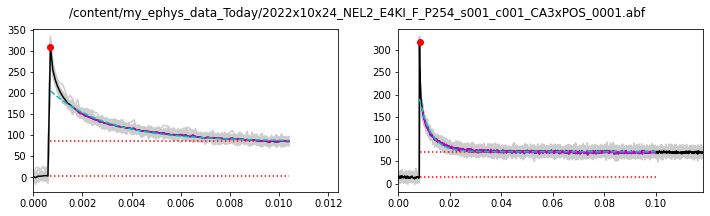

  7%|▋         | 2/27 [00:01<00:12,  1.95it/s]

<Figure size 432x288 with 0 Axes>

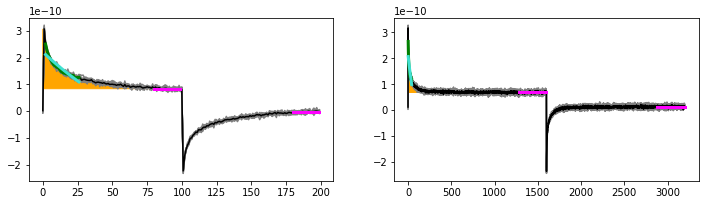

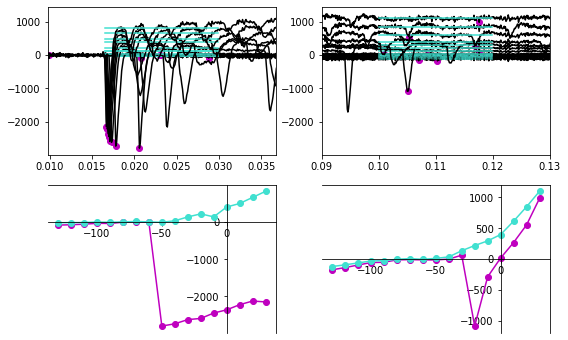

 11%|█         | 3/27 [00:02<00:20,  1.15it/s]

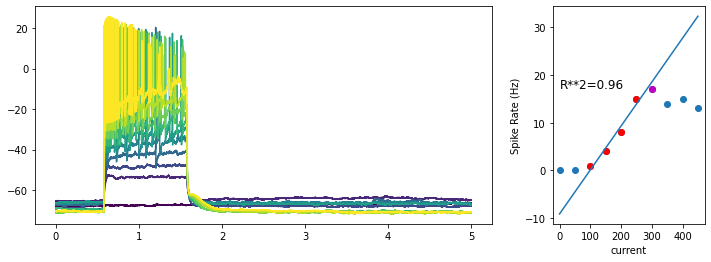

 15%|█▍        | 4/27 [00:05<00:35,  1.53s/it]

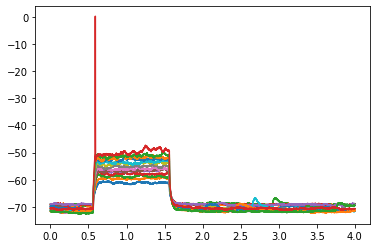

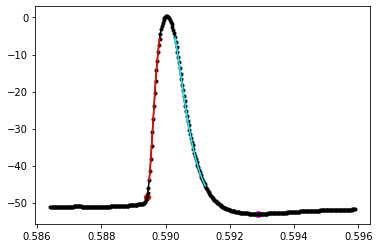

 19%|█▊        | 5/27 [00:10<01:03,  2.88s/it]

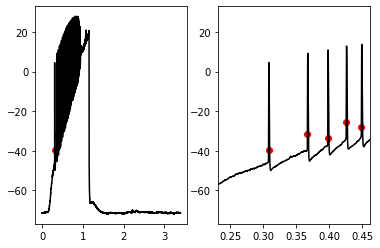

 26%|██▌       | 7/27 [00:12<00:37,  1.86s/it]

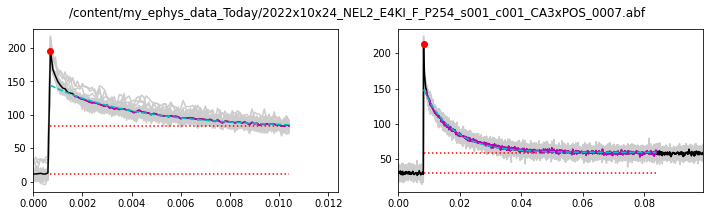

 30%|██▉       | 8/27 [00:13<00:30,  1.58s/it]

<Figure size 432x288 with 0 Axes>

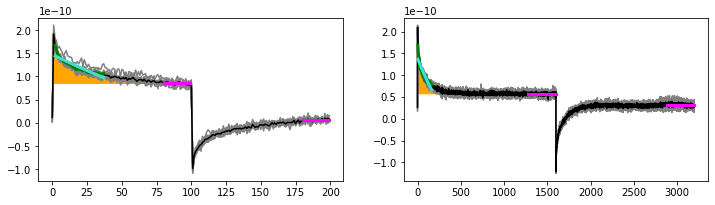

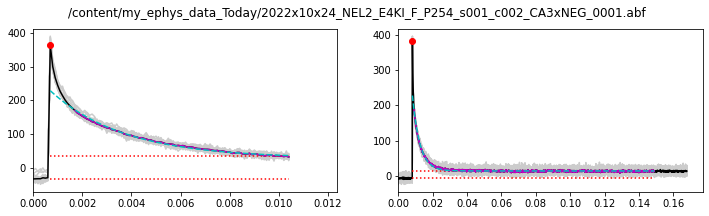

 37%|███▋      | 10/27 [00:14<00:18,  1.10s/it]

<Figure size 432x288 with 0 Axes>

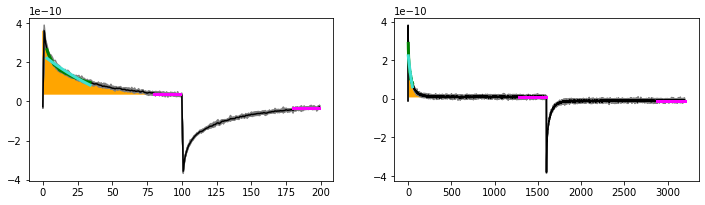

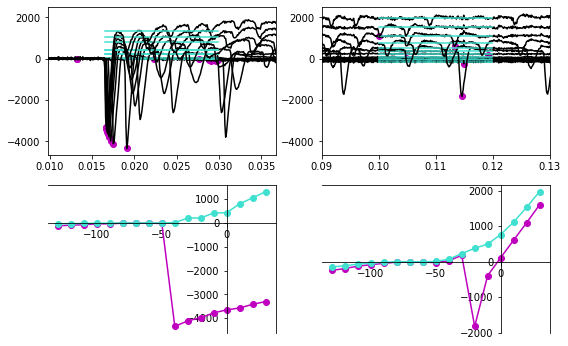

 41%|████      | 11/27 [00:15<00:18,  1.18s/it]

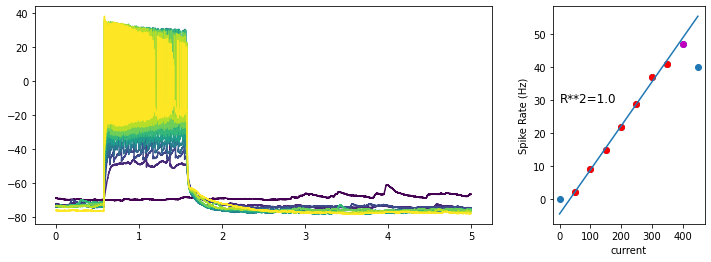

 44%|████▍     | 12/27 [00:18<00:23,  1.57s/it]

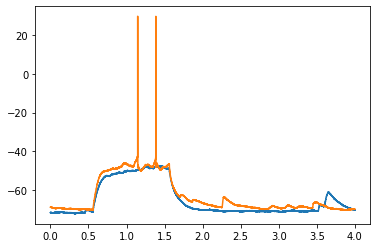

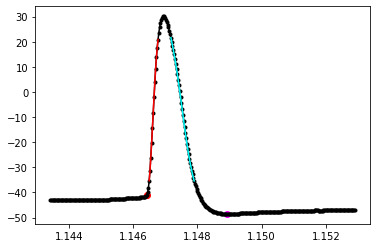

 48%|████▊     | 13/27 [00:21<00:28,  2.01s/it]

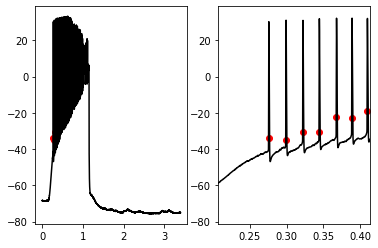

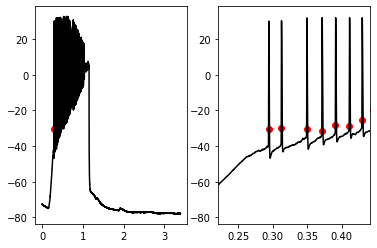

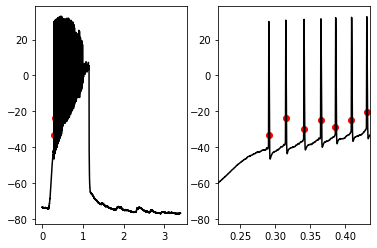

 52%|█████▏    | 14/27 [00:23<00:24,  1.88s/it]

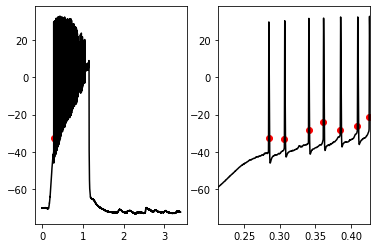

 59%|█████▉    | 16/27 [00:25<00:15,  1.45s/it]

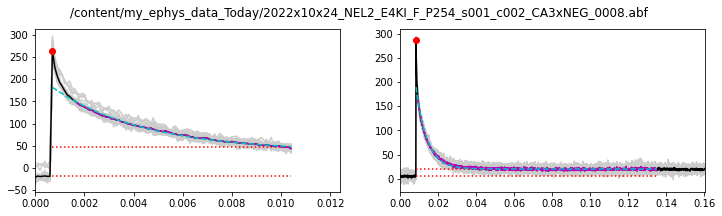

 63%|██████▎   | 17/27 [00:25<00:12,  1.28s/it]

<Figure size 432x288 with 0 Axes>

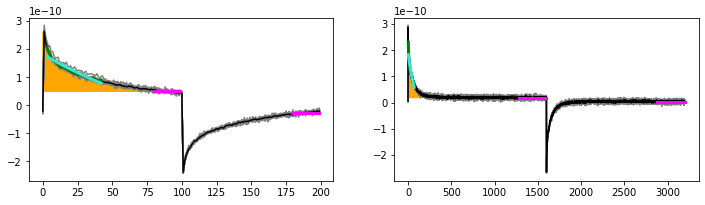

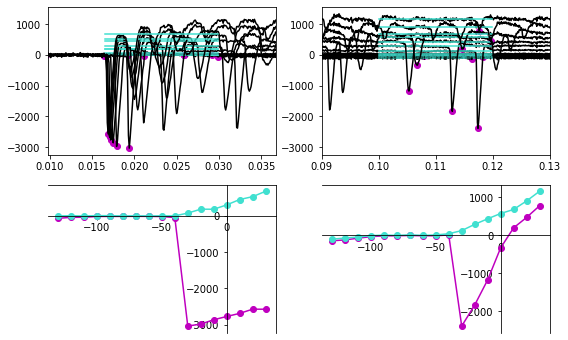

 67%|██████▋   | 18/27 [00:27<00:12,  1.33s/it]

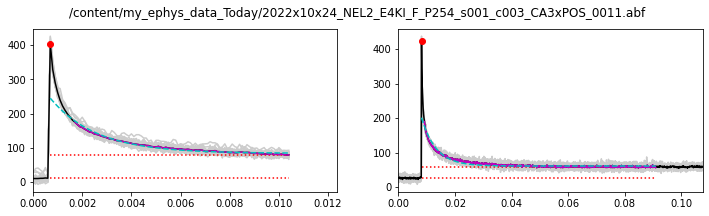

 74%|███████▍  | 20/27 [00:28<00:06,  1.08it/s]

<Figure size 432x288 with 0 Axes>

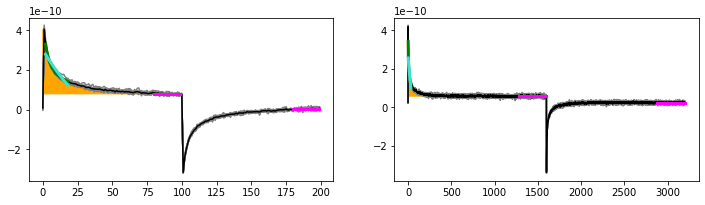

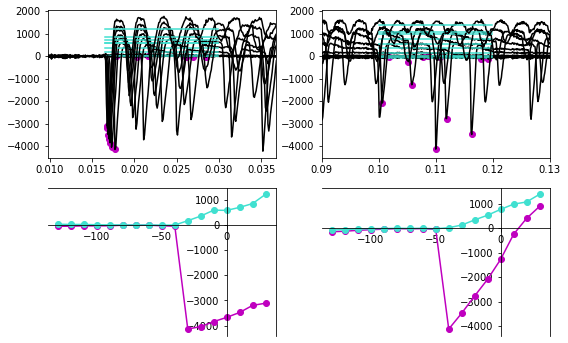

 78%|███████▊  | 21/27 [00:29<00:06,  1.04s/it]

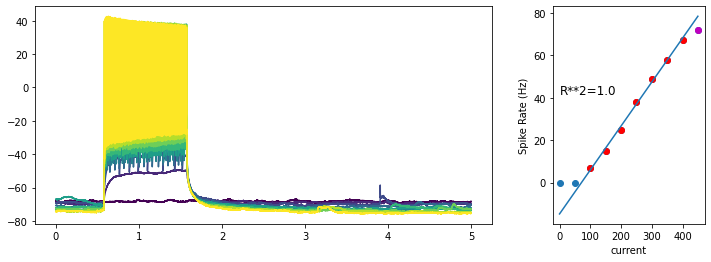

 81%|████████▏ | 22/27 [00:32<00:07,  1.45s/it]

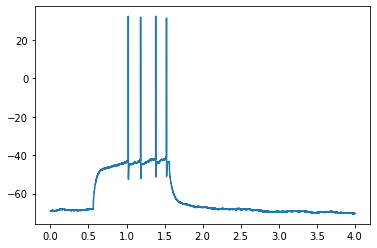

 85%|████████▌ | 23/27 [00:32<00:04,  1.17s/it]

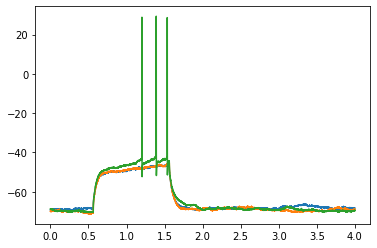

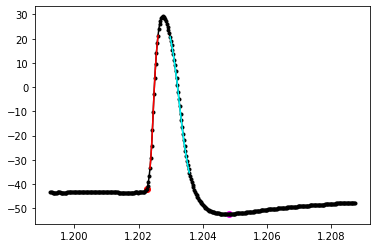

 89%|████████▉ | 24/27 [00:36<00:05,  1.82s/it]

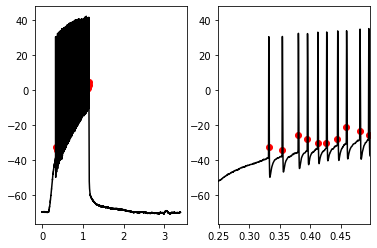

 96%|█████████▋| 26/27 [00:38<00:01,  1.59s/it]

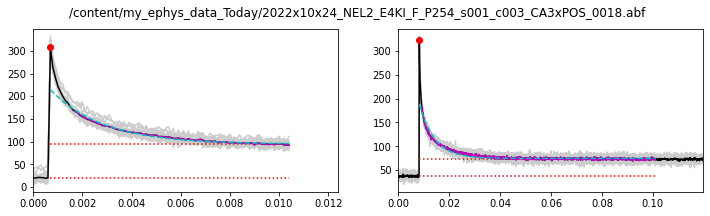

100%|██████████| 27/27 [00:39<00:00,  1.47s/it]


problem_recs
updating: content/Saved_Figs/ (stored 0%)
updating: content/Saved_Figs/IV_Curves/ (stored 0%)
updating: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c002_CA3xNEG_0002.png (deflated 5%)
updating: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c002_CA3xNEG_0009.png (deflated 5%)
updating: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0002.png (deflated 5%)
updating: content/Saved_Figs/IV_Curves/IV_Curves_2022x10x24_NEL2_E4KI_F_P254_s001_c003_CA3xPOS_0012.png (deflated 5%)
updating: content/Saved_Figs/Spike_latency/ (stored 0%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s001_c002_CA3xNEG_0005.png (deflated 8%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s001_c003_CA3xPOS_0016.png (deflated 8%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0005.png (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

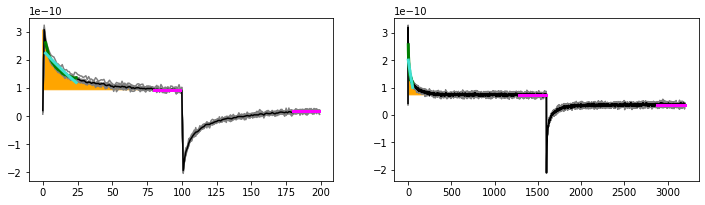

In [4]:
dataset = {'data_name': 'Today',
           'data_source': "https://www.dropbox.com/sh/5vbxypqs4cmpp30/AABjnr27ry8GrcloIOFItBf5a?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

Fast_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,strat_cols=['Rec_date', 'Cell_Type'])